> # Outline:
>
> 1. ***Analysis Of Variance***
>
>  
> - Statistical Models
>
>      - The Concept
>      - Data Synthesis: What the Model Means.
>
>
>    - Analysis of Variance (ANOVA) - The Concept
>
>    - The One-Way Analysis of Variance
>
>        - Introduction
>        - Design and Model
>        - Statistical Hypotheses in the ANOVA
>        - Sums of Squares
>        - Degrees of Freedom
>        - Mean Squares
>        - The Analysis of Variance Table
>        - Test of Hypothesis – The F-Test
>        - Comparison of the F-test in the ANOVA with 1 df for Treatment, versus, the Two-sample Independent t-test.
>        - Worked Example 
>        - Assumptions in the ANOVA Process
>
>
> 2. ***Using R***
>
>  - Using R for ANOVA
>
>  - Calculating and Testing a Mean: The One-Sample t-test.
>
>  - Protected $t$-tests in R: Multiple Comparisons of Treatment Means (MCTM).
>
>
> **Accompanying Workshops - done in week 8**
>
>  - The analysis of variance process - by hand and using R
>
>  - Multiple comparisons of means - when the ANOVA rejects the null hypothesis.
>
>
> **Project Requirements for Week 7**
>
> - Nil.

# 1. Statistical Models

## 1.1 The Concept

All statistical tests are based on an underlying statistical model.

> **Example - The Independent t-test**
>
> When a comparison of two treatment means is carried out using samples from two
independent populations, it is assumed that the data observations are constructed from the
following model:
>
> observation = treatment mean + error
>
> The test involves comparing the variation between the treatment means with the variation
within each treatment - not all observations from the one treatment will be identical.
>
> BUT: Before looking at the treatment means, we usually subtract the overall mean, and work
with deviations from this general mean - recall that the definition of variance involves the
deviations, not the original observations.
>
> The correct statistical model is thus:
>
> observation = overall mean + treatment effect + error
>
> The treatment effect assesses how the particular treatment shifts the observations above or
below the overall (general) mean.


***Testing equality of treatments means $\equiv$ testing equality of their effects.***

The **statistical** model includes reference to an **error** component, which is a means of
indicating the random variation expected **within** the same treatment - it acknowledges the
**natural variation** in the observations.

The modeling of the natural variation (or random error) requires using the **distribution** it
follows. Traditionally this has depended on invoking some known mathematical formula, eg.,
the normal distribution function. Recent increases in computational power offer alternatives to this - see later
discussion.

## 1.2. Data Synthesis - What the Model Means

When a model is specified for a dependent variable (the variable of interest), the researcher is stating a belief that the
variable of interest is made up of several components. The ANOVA aims to test this belief
and also to provide estimates of the various component parts of the model. That is, each data
value is to be analysed to find its component parts.

> **Example:**
> 
> We wish to explore the effect of a new method of harvesting within the forest, on the damage
to adjacent trees – note that system of harvesting is the treatment. The measurement taken will
be percentage of trees within two metres of the felled tree, which have some form of damage.
>
>The following information is available:
>
> - mean damage if tractor system and no guidance: 90%
> - mean damage using current harvesting system 1 (CS1): 60%
> - mean damage using current harvesting system 2 (CS2): 50%
>
> It is believed that the new system will give an improvement of 30% over the best current
system. Thus the mean damage when the new system is used will be 20%. It has been decided
to use five random replicates of each of the four treatments: tractor, CS1, CS2 and new.
>
> The statistical model being proposed for the individual observations of % damage is thus:
>
> $$ \text{% Damage} = \text{general constant} + \text{system effect} + \text{individual variation}$$
>
> $$ \%D_{ij} = \mu + sy_i + \epsilon_{ij}$$
>
> The known values of the effects can be used to simulate a set of typical data. Analysis of
these data should lead to estimates which closely reflect those used in the simulation.
>
> The overall average will be an average of the four treatment means:
>
> $$(90 + 60 + 50 + 20)/4 = 55.$$
>
> The effect size of each harvesting system treatment will be:
>
> - Nil guidance (mean of 90): effect (nil) +35
> - CS1 (mean of 60): effect (CS1) +5
> - CS2 (mean of 50): effect (CS2) -5
> - New (mean of 20): effect (new) -35
>
> To complete the synthesis we need some estimate of standard deviation (natural variability
seen in different parts of the forest using the same system). Previous studies indicate a
standard deviation of 10%. For the distribution of the random errors assume a normal
statistical distribution, with given sd.
>
> That is: $N(0,100)$ mean of zero, sd of 10 becomes variance of 100
>
> Suppose that we synthesise the data for a **completely randomised experiment** such as will be
used in getting the real data. That is, we want five random replicates of the four harvesting
treatments; in total 20 individual observations must be created.
>
> The model proposed is:
> $$ \text{% damage} = \mu + \text{system effect} + \text{random bit}$$
>
> We start with 20 individuals that have a basic mean of 55 ($\mu= 55$):

In [2]:
harvesting.system <- factor(rep(c("nil", "CS1", "CS2", "new"), each = 5))
observations <- rep(55, 20)
dat <- data.frame(harvesting.system, observations)
dat

harvesting.system,observations
<fct>,<dbl>
nil,55
nil,55
nil,55
nil,55
nil,55
CS1,55
CS1,55
CS1,55
CS1,55


> Each individual tree has its own peculiarities which we have said are distributed as a normal
variable with a mean of zero and standard deviation of 10. A random sample is selected from
a normal distribution with these parameters, usually using a computer package but tables are
available.
>
> These 20 random deviates are assigned at random to the 20 trees being simulated:

In [3]:
dat$observations <- dat$observations + rnorm(20, mean = 0, sd = 10)
dat

harvesting.system,observations
<fct>,<dbl>
nil,57.38584
nil,48.18397
nil,60.95338
nil,48.83491
nil,64.34795
CS1,52.00286
CS1,51.03001
CS1,59.89299
CS1,50.20968


> Finally the allocated harvest system effects are added to complete the model and give the
simulated data:

In [4]:
sys.effect <- rep(c(35, 5, -5, -35), each = 5)
dat$observations <- dat$observations + sys.effect
dat

harvesting.system,observations
<fct>,<dbl>
nil,92.38584
nil,83.18397
nil,95.95338
nil,83.83491
nil,99.34795
CS1,57.00286
CS1,56.03001
CS1,64.89299
CS1,55.20968


# 2. Analysis of Variance (ANOVA) - The Concept

It is clear that observed data vary. The ultimate aim of analysing this variation is to determine
how much of it is due to known causes, and how much is due to individual differences or
random, unexplained causes.

The statistical model clearly identifies the known causes and the unknown component (the
error). If the only variable in the model is a treatment effect, then the entire known
component will be due to the treatments. In more sophisticated experimental designs, some
of the known component may be part of the design - this situation is covered in second year.
For treatments to produce a significant amount of variation in the observations, we usually
expect them to have different means. Indeed, in a classical ANOVA using an F-test, we
assume that the only way that the treatments could affect the observations is to change the
mean value; there are no differences in any other aspect of the distributions associated with
each treatment.

Recall the independent t-test, which provides an objective way of assessing whether or not
two treatment means are different. The ANOVA provides an extension of this idea to
situations where there are more than two treatments, and what is wanted is a way of
objectively testing whether there are any real differences between the treatment means in a
global sense. The ANOVA provides a way of comparing more than two treatment means at
the same time.

The variation which is analysed is measured as the mean square, which is the sum of
squares divided by the degrees of freedom – recall the basic definition of the standard
deviation.

# 3. The One-Way Analysis of Variance

## 3.1 Introduction

When the variation in the observed data is partitioned into two sections, one attributable to the
treatments (explained) and the other to natural (error, residual, unexplained) sources, the
process is described as a one-way ANOVA. Later in this section we will look at situations
where the variation is split-up into more than just one explained effect.

For a one-way ANOVA, the two sources of variation are known as:

- a between treatment variation; and
- a within treatment variation.

The ‘within-treatment’ variation represents the left-over or residual part after treatments have
been taken into account; the natural variation, unexplained variation or error.

Other names frequently used for a one-way analysis are:

- ‘between and within’ - meaning sources of variation are between treatments and within treatments
- ‘completely randomised ANOVA’ - indicating that the analysis regards the data as having come from a completely randomised experimental design model.

## 3.2 Design and Model

In a completely randomised design (CRD), a number of treatments, say k, are each replicated
a number of times. The ‘treatments’ represent ‘populations’ or ‘groups’ that are to be
compared.

For example, four treatments, A, B, C and D, could each be replicated three times. This would
require 12 (i.e. $4 \times 3$) experimental units or plots.

For the design to be a CRD, the four treatments must be assigned to the 12 plots at random,
i.e. without any pattern. A schematic way of representing this is:
The numbers refer to the experimental units (plots) and the letters represent the treatments
allocated at random.

|     |     |     |      |      |      |
|-----|-----|-----|------|------|------|
| 1 B | 2 C | 3 A |  4 C |  5 A |  6 B |
| 7 A | 8 D | 9 B | 10 D | 11 D | 12 C |

The numbers refer to the experimental units (plots) and the letters represent the treatments
allocated at random.

In a CRD, the only sources of variation are the treatments and random error. Thus each piece
of data (i.e. each measurement) can be thought of as being made up as follows:

measurement = general mean + treatment effect + random error .

This model is specified symbolically as:
$$
y_{ij} = \mu + \alpha_i + \epsilon_{ij}
$$

where:
- $y_{ij}$ is the $j$th observation (replicate) on the ith treatment, $i = 1, \ldots, k$  and $j = 1, \ldots, n_i$
- $n_i$ is the number of replicates in treatment $i$;
- $\mu$ is the overall population mean;
- $\alpha_i$ is the effect of the $i$th treatment;
- $\epsilon_{ij}$ is the random variation associated with the $ij$th observation.

Note that this is the model used in the synthesis exercise above.

> **Examples:** Write the models for each of the experiments described below:
>
> 1. Four species of midge are being compared for their ability to survive when inundated
with water – part of a project to help canal estate residents to survive the summer
outdoors. The experiment involves four replicates of each species.
>
> 2. A comparison is to be made of the effects of single sex classes on the learning of
Grade 11 students. Five state high schools have been selected to participate in the
study, and in each school one class of each of males, females and co-ed will be
monitored.
>
> 3. A study will compare the levels of hydrocarbon in muscle tissues of individuals at
different levels of the food chain. Six levels have been identified and at each level a
random sample of six individuals will be measured.
>
> 4. The average loss due to house thefts is believed to be much greater in Sydney than in
other Australian capital cities. Over a two year period in each of the eight cities, a
random sample will be taken of the losses reported to insurance companies.
>
> 5. A comparison is to be made of the annual incomes of a number of categories of small
businesses. Random samples of businesses in each of the categories are selected at
random from the official taxation office listings


***NOTES:***

- For the CRD, the number of replications for the treatments need not be equal.

- The mean of the $i$th treatment is given as: $\mu + \alpha_i$.

## 3.3 Statistical Hypotheses in the ANOVA

The reason for comparing several treatment means simultaneously is to see whether or not
there are any differences between all or just some of the means. Such differences will then
be said to indicate differences between the treatments involved, with respect to the mean
values of the variable whose means have been calculated. Thus the null hypothesis, which
again must contain equality, will be that there is no difference between the population
(treatment) means; that is, the (treatment) means are all equal.

[Check you understand the reason for equality and why the word "treatment" has been
bracketed.]

***The null hypothesis is:***

$$H_0: \mu_1 = \mu_2 = \ldots = \mu_k$$

where

- $\mu_i$ is the population mean of the variable for the $i$th treatment;
- $k$ is the number of treatments.

In English: ***the k population treatment means are all equal.***

***The alternative hypothesis is:***

$$H_1: \text{the population treatment means are not all equal.}$$

Expressing $H_1$ in symbolic form is not straightforward and is unnecessary for this course.

## 3.4 Sums of Squares

The aim of the analysis of variance technique is to partition the variation, but, as you have
already seen, variation is defined as the ratio of "sum of squares" to "degrees of freedom".
Recall the earliest measure of variation you have used, namely:

$$
S^2 = \frac{\sum(y - \bar{y})}{n-1} = \frac{\text{sums of squares}}{\text{degrees of freedom}}
$$

This represents the TOTAL variation in the data.

What is needed is a breakdown of this total variation into its parts. Each ‘deviate’ (the amount
an individual observation differs from the overall mean) can be broken into the part that is due
to the treatment and the ‘left over’ or random piece. It turns out that the sums of squares (SS) part of the variation calculation is very important in this regard.

It can be shown that the Total SS breaks down into two components:

$$
\text{Total Sum of Squares = Treatment Sum of Squares + Random Sum of Squares}
$$

**Working Formulae for Finding Sum of Squares**

\begin{align*}
\text{Total SS} &= \sum_i\sum_j y_{ij}^2 - \frac{(\sum_i\sum_j y_{ij})^2}{n} \\
   &= \text{Raw SS - CF}
\end{align*}

where $n$ is the total number of observations – it will be the sum of $n_i$, the number of observations in each treatment.

Raw SS is simply the sum of each squared value – find it by squaring each observation and then adding up the squares.

CF is the Correction Factor and is the square of the sum of all values divided by the number of values involved – find it be adding up all the observations, squaring the total, and then dividing by the number of observations. The CF is the part of the calculation that corrects for
the overall mean.

\begin{align*}
\text{TSS = Treatment SS} &= \sum_i \frac{T_i^2}{n_i} - \text{CF}
\end{align*}

TSS is found by getting the total of the observations in each treatment ($T_i$), squaring it, and dividing by the number of observations in the treatment; these values from each treatment are then added together and
the correction factor subtracted from this sum.

$$
\text{ESS = Error Sum of Squares = Residual Sum of Squares = Tot SS - TSS}
$$

This Error/Residual Sum of Squares is simply the Unexplained Sum of Squares and it is usually found by subtraction as indicated.

## 3.5 Degrees of Freedom

As before, total degrees of freedom are given by one less than the total number of pieces of
data.

The degrees of freedom involved in the comparison of the treatment means is one less than
the number of treatments. Think about this from the point of view of how many independent
comparisons can be made. This will be discussed in lectures.

The error (or residual) degrees of freedom, is the difference between the total degrees of
freedom and the treatment degrees of freedom.

OR

The error d.f. can be obtained by considering the contribution to error made by each
treatment.

**Examples:**

1. With four treatments, each replicated three times, the degrees of freedom breakdown will be:

| Source    | DF |
|-----------|:--:|
| Treatment |  3 |
| Error     |  8 |
| Total     | 11 |

2. Suppose five treatments are replicated as follows:

| Treatment    |  A | B | C | D | E | Total |
|--------------|:--:|:-:|:-:|:-:|:-:|:-----:|
| Replications | 12 | 9 | 8 | 7 | 9 |   45  |

| Source     | DF |  Explanation |
|------------|:--:|:------------:|
| Treatments |  4 |     (5-1)    |
| Error      | 40 | (11+8+7+6+8) |
| Total      | 44 |    (45-1)    |

## 3.6 Mean Squares

The variance is given by the ratio of a sum of squares to its degrees of freedom. In general,
we define this ratio as: the mean square.

For a completely randomised design, there are two mean squares of interest:
treatment mean square and error mean square.

The treatment mean square is an estimate of the treatment variance and represents the
amount of variation between treatments.

The error mean square is an estimate of the error or residual variance and represents the
amount of random variation within treatments. It is a measure of the natural variability, and
is the best estimate of the population variance, $\sigma^2$.

If $H_0$ is correct and there is no difference between the treatment means, any variation between
treatments must simply be random variation, and the treatment mean square also estimates the
population variance, $\sigma^2$. Thus both mean squares (treatment and error) are estimates of the
same thing and, as such, they should be equal, and their ratio will be one.

The ratio of the treatment mean square to the error mean square is called the: variance ratio. Under $H_0$, given all assumptions are true, the variance ratio has an F-distribution.

At this point, you should think very clearly about $H_0$ and the F-test. The hypothesis tested by
an F-test is that of equality of variances, but the hypothesis given for the ANOVA concerns
means. How is this apparent anomaly explained?

## 3.7 The Analysis of Variance Table

The calculations involved in the analysis of variance are usually summarised in an analysis of
variance table as follows:

| Source                         |  DF | Sums of Squares |   Mean Squares  | Variance Ratio |
|--------------------------------|:---:|:---------------:|:---------------:|:--------------:|
| Between Treatments (Treatment) | k-1 |       TSS       | TMS = TSS/(k-1) |     TMS/ESS    |
| Within Treatments (Error)      | n-k |       ESS       | EMS = ESS/(n-k) |                |
| Total                          | n-1 |      Tot SS     |                 |                |

## 3.8 Test of Hypothesis – The F-Test

The statistical hypotheses which are tested in the analysis of variance were given above and
are:

\begin{align*}
H_0:& \mu_1 = \mu_2 = \ldots = \mu_k \\
H_1:& \text{The treatment means are not all equal}
\end{align*}

If $H_0$ is true: variation due to treatments = the natural variation, estimated by EMS.

If $H_0$ is false: treatment variation > the natural variation, i.e. TMS > EMS.

$H_0$ true: TMS/EMS = VR = 1.

How do we test whether or not a result which is different from 1 is really different???

It can be shown that if assumptions given below hold and $H_0$ is true then: $\text{VR} \sim F_{\text{tdf, edf}}$
where F is: a distribution with known mathematical form available in a table format – see tables.

Depends on 2 types of degrees of freedom: 1 for the numerator & 1 for the denominator

General shape of F is:



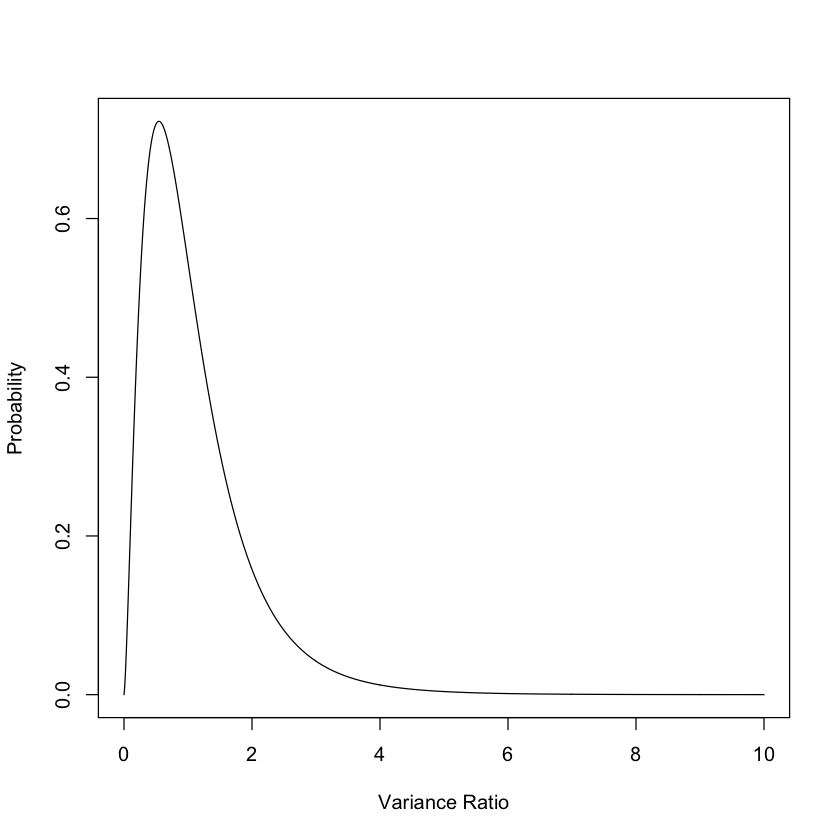

In [12]:
plot(seq(0,10, 0.01), df(seq(0,10, 0.01), 5, 20), type = "l", ylab = "Probability", xlab = "Variance Ratio")

***Examples of using F-tables (see previous example on projected anovas)***
>
> 1. 4 treatments and 3 replicates: treatment df = 3 error df = 8 $\rightarrow F_{3,8}(0.05) = 4.07$
>
> 2. 5 treatments with replicates, 12, 9, 8, 7 and 9: treatment df = 4 error df = 40  $\rightarrow F_{4,40}(0.05) = 2.61$

***Worked Example:***
>
>Two types of air filter have been compared in order to assess their effectiveness in reducing
particulate discharge into the atmosphere. Each filter type was run over a period of 10 days
and the amount of particulates discharged measured. These particulate readings were found to
be:
>
> | Filter/Day |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 | 10 | Total |
|:----------|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:-----:|
|  Standard  | 24 | 28 | 38 | 41 | 32 | 45 | 33 | 39 | 50 | 18 |  348  |
|     New    | 15 | 24 | 39 | 44 | 17 | 28 | 18 | 35 | 22 | 20 |  262  |
>
>
> \begin{align*}
\text{Tot SS} &= 24^2 + 28^2 + \ldots + 22^2 + 20^2 - \frac{(24 + 28 + \ldots + 22 + 20)^2}{20} \\
 &= 20732 - \frac{(610)^2}{20} \\
 &= 20732 - 18605 \\
 &= 2127 \\
 & \\
\text{Treat SS} &= \frac{348^2}{10} + \frac{262^2}{10} - \frac{610^2}{20} \\
 &= 18974.8 - 18605 \\
 &= 369.8 \\
 & \\
 \text{Error SS} &= 2127 - 369.8 \\
 &= 1757.2
\end{align*}
>
>
> **Degrees of freedom:**
>
> total = 20 - 1 = 19
>
> treatment = 2 - 1 = 1
>
> error = 19 - 1 = 18 (or $2 \times (10 - 1)$)
>
> **ANOVA Table:**
>
> | Source                         |  DF | Sums of Squares |   Mean Squares  | Variance Ratio |
|--------------------------------|:---:|:---------------:|:---------------:|:--------------:|
| Between Treatments (Filter) | 1 |       369.8       | 369.8 |     3.7881    |
| Within Treatments (Error)      | 18 |       1757.2       | 97.622 |                |
| Total                          | 19 |      2127.0     |                 |                |
>
>
> From tables: $F_{1,18}(0.05) = 4.414 \rightarrow \text{ critical region: VR} > 4.414$
>
> Calculated VR of 3.7881 < 4.414 so we cannot reject $H_0$ and conclude that there is no
evidence to support the research hypothesis that there is a significant difference between the
population mean particulate levels for the two filters (p > 0.05).
> 
> NOTE: If significance level used is 0.10 instead of 0.05 then: $F_{1,18}(0.10) = 3.007$ and we reject $H_0$.



## 3.9 Comparison of the F-test in the ANOVA with 1 df for Treatment Versus the Two Sample Independent t-test.

| Standard Filter | New Filter      |
|-----------------|-----------------|
| mean = 34.8     | mean = 26.2     |
| std dev = 9.762 | std dev = 9.998 |

$S_{\text{p}}^2 = \frac{9 \times 9.762^2 + 9 \times 9.998^2}{10 + 10 - 2} = 97.622$; $S_p = 9.880$.

$$
T = \frac{34.8 - 26.2}{9.880 \times \sqrt{\frac{1}{10} + \frac{1}{10}}} = \frac{8.6}{4.418} = 1.946.
$$

From ANOVA: EMS = 97.622 & $\sqrt{\text{EMS}}$ = 9.880 = $S_p$ from above.

VR = 3.788 & $\sqrt{VR}$ = 1.946, the equivalent t test statistic, T.

From Tables: $F_{1,18}(0.05) = 4.414$.  $t_18(0.025) = 2.109 = \sqrt{4.414}$.

Note for the tabled values and the sample test statistics, the F is the square of the equivalent $t$ value – $2.109^2$ = 4.414 and $1.946^2$ = 3.788.



## 3.10 Worked Example:

A study has been carried out to test the belief that some butterfly species are more fragile than others. The wing thickness was used as a measure of fragility. 

We wish to investigate the differences between the mean wing thicknesses of the three species.

\begin{align*}
H_0:& \mu_1 = \mu_2 = \mu_3 \\
H_1:& \text{The treatment means are not all equal}
\end{align*}

where $\mu_i$ is the population mean wing thickness for the ith butterfly species.

The resulting data have been analysed and the results are presented in tabular form as:

| Source                         |  DF | Sums of Squares |   Mean Squares  | Variance Ratio |
|--------------------------------|:---:|:---------------:|:---------------:|:--------------:|
| Between Species | 2 |       16.7000       | 8.3500 |     17.822    |
| Within Species      | 9 |      4.2167       | 0.4685 |                |
| Total                          | 11 |   20.9167     |                 |                |


Under $H_0$, the variance ratio, $VR \sim F_{2 , 9}$

From tables, $F_{2,9}(0.05) = 4.26$. Thus the critical region is $F > 4.26$.

The calculated VR of 17.822 lies in the critical region and $H_0$ is rejected.

We conclude that there is a significant difference ($p < 0.05$) between the mean wing
thicknesses of the three butterfly species.

**NOTES**

- Rejection of $H_0$ in the ANOVA does not indicate which treatment means are different. It only specifies that there are some differences somewhere. Further testing is needed to determine where the differences actually are.

- The sums of squares in the ANOVA are additive, but the mean squares are not. BEWARE!

## 3.11 Assumptions in the ANOVA Process

The inferences involved in the analysis of variance require the following assumptions:

- the error terms must be independent;

- the error terms must each have a mean of zero;

- the error terms must all have the same variance;

- the terms in the model (treatment effects and error term) must be additive.

Depending on the statistical test used in the ANOVA, additional assumptions may be
necessary, eg., if the F-test is used, the variable analysed must have an approximately normal
distribution.

Note that this last assumption is also required in the various forms of the t-test.

# 2. USING THE R SOFTWARE – WEEKS 7/8

Note that this covers the lecture material in weeks 7 and 8

The function that does anova in R is `aov()`.

We could also use the `lm()` function, but `aov()` is designed specifically for analysis of
variance, so we will use that. The required code will be demonstrated with the following
example.

**An Example – Hangover Antidotes**

Certain members of a club, intrigued by suggested antidotes to the consequences of drinking,
decided to investigate the following four well-known antidotes:

- A1 - mashed potato (1 kg) 

- A2 - milk (500 ml) 

- A3 - raw onion (1) [AKA the "Tony Abbott"]

- A4 - water (500 ml)


Twenty one volunteers were selected with five being assigned at random to each of A1, A2
A3 and A4. Each volunteer was given the assigned antidote and then required to drink a
prescribed amount of alcohol, an amount kept secret to protect the innocent. One hour after
the volunteer had drunk the alcohol, a sample of his/her blood was taken and tested for blood
alcohol. The results are given below.

| Antidote/rep |  1  |  2  |  3  |  4  |  5  | Total |
|--------------|:---:|:---:|:---:|:---:|:---:|------:|
| A1           |  76 |  52 |  92 |  80 |  70 |   370 |
| A2           | 110 |  96 |  74 | 105 | 125 |   510 |
| A3           |  95 | 145 | 100 | 190 | 201 |   731 |
| A4           |  87 |  93 |  91 | 120 |  99 |   490 |

Analyse these data and prepare a report for the club members on the comparative merits of the four antidotes.

\begin{align*}
\text{Tot SS} &= 76^2 + 52^2 + \ldots + 120^2 + 99^2 - \frac{(76 + 52 + \ldots + 120 + 99)^2}{20} \\
 &= 246937 - \frac{(2101)^2}{20} \\
 &= 246937 - 220710.05 \\
 &= 26226.95 \\
 & \\
\text{Treat SS} &= \frac{370^2}{5} + \frac{510^2}{5} + \frac{731^2}{5} + \frac{490^2}{5}- \frac{2101^2}{20} \\
 &= 234292.2 - 220710.05 \\
 &= 13582.15 \\
 & \\
 \text{Error SS} &= 26226.95 - 13582.15 \\
 &= 12644.80
\end{align*}


 **Degrees of freedom:**

 total = 20 - 1 = 19

 treatment = 4 - 1 = 3

 error = 19 - 3 = 16 (or $4 \times (5 - 1)$)

 **ANOVA Table:**
 
| Source                 |  DF | Sums of Squares |   Mean Squares  | Variance Ratio |
|--------------------------------|:---:|:---------------:|:---------------:|:--------------:|
| Between Treatments (Antidote) | 3 |       13582.15       | 4527.3833 |     5.73    |
| Within Treatments (Error)      | 16 |     12644.80      |  790.3000 |                |
| Total                          | 19 |     26266.95     |                 |                |


 From tables: $F_{3,16}(0.05) = 3.239 \rightarrow \text{ critical region: VR} > 3.239$

Calculated VR of 5.73 < 3.239 so we reject $H_0$ and conclude that there are significant differences between the population mean blood alcohol levels for the 4 antidotes (p < 0.05).

## 2.1 Hangover Antidotes: ANOVA Using R

The model claimed to explain an individual's blood alcohol is:

$$
ba_{ij} = \mu + an_i + \epsilon_{ij}, \text{ } i = 1, \ldots, 4; j = 1, \ldots, 5.
$$

In words: the blood alcohol of a particular individual depends on which antidote he/she has taken ($an$) and on some basic individualism ($\epsilon$). The indices, $i$ and $j$ are used to identify a
particular person's blood alcohol reading by indicating which antidote the person is taking ($i$) and then which particular person is wanted within the group receiving that antidote ($j$).

The hypotheses being tested by this model are:

\begin{align*}
H_0:& \mu_1 = \mu_2 = \mu_3 = \mu_4\\
H_1:& \text{The treatment means are not all equal}
\end{align*}

where $\mu_i$ is the population mean blood alcohol for the ith antidote.

First we need to enter the data into R:

In [2]:
ba <- c(76, 52, 92, 80, 70,
 110, 96, 74, 105, 125,
 95, 145, 100, 190, 201,
 87, 93, 91, 120, 99)

antidote <- factor(rep(c("Mashed Potato", "Milk", "Onion", "Water"),
c(5, 5, 5, 5)))

# Put data into a dataset called hangovers:
hangovers <- data.frame(antidote, ba)
#Remove variables to keep workspace clean:
rm(ba, antidote)

The `aov()` function does anovas in R. The syntax looks like this:

`name.the.model <- aov(y.variable ~ factor.variable, data = dataset)`

The `summary()` function provides a summary of the ANOVA and prints out the ANOVA table.

In [3]:
hangover.model <- aov(ba ~ antidote, data = hangovers)
summary(hangover.model)

            Df Sum Sq Mean Sq F value  Pr(>F)   
antidote     3  13582    4527   5.729 0.00736 **
Residuals   16  12645     790                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

From the R output we can see that the effect of antidote is significant at the 0.05 level of significance (p-value for antidote is 0.00736 < 0.05). We can therefore reject the null hypothesis in favour of the alternative and conclude that at least one antidote has a different
mean blood alcohol level.

To find out which means differ, we use the Least Significant Difference, LSD (see lecture notes for week 8). To obtain the LSD in R, we first need to download and install an R library called `agricolae`:

In [7]:
install.packages("agricolae")
library(agricolae)

also installing the dependencies ‘rlang’, ‘ellipsis’, ‘e1071’, ‘haven’, ‘lifecycle’, ‘vctrs’, ‘classInt’, ‘labelled’, ‘questionr’, ‘klaR’, ‘AlgDesign’

Warning message in install.packages("agricolae"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘e1071’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘AlgDesign’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘ellipsis’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘lifecycle’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘classInt’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘vctrs’ had non-zero exit status”Warning message in install.packages("agricolae"):
“installation of package ‘ha

ERROR: Error in library(agricolae): there is no package called ‘agricolae’


You only need to install the package once if you are using your own computer (if you are using the University computers you will need to install the package every time you log in).

We can use a library/package we have installed by using the `library()` function as above.

The `agricolae` library contains many R functions, but we are only interested in one for this course: the `LSD.test()` function. The syntax to use this function is:

In [6]:
hangovers.lsd <- LSD.test(hangover.model, "antidote", console = T)

ERROR: Error in LSD.test(hangover.model, "antidote", console = T): could not find function "LSD.test"


From the output of the LSD test and the graph, we can see that Onion has a significantly higher mean blood alcohol than all the other antidotes (its letter, “a”, is different to all the others). Milk, water, and mashed potato are not significantly different to each other (their
letters are all “b”, indicating they are not significantly different to each other).

An overall conclusion to the analysis would therefore be:
There is a significant effect of antidote on mean blood alcohol (p-value = 0.00736). Further testing using the Least Significant Difference value shows that Onion is associated with the highest mean blood alcohol (146.2), and that this is significantly higher than the other three
antidotes (p-value < 0.05). The remaining three hangover cures (milk, water, and mashedpotato) are not significantly different to each other in terms of mean blood alcohol (p-value >0.05). 

In terms of hangover cures, the analysis shows that eating a raw onion (aka "doing a Tony Abbott") is significantly worse than drinking milk or water, or eating mashed potato.



## 2.2 Harvester Example - ANOVA Using R:

The model claimed to explain the percent damage due to the various harvester types is:

$$
PercentDamage_{ij} = \mu + harvester_i + \epsilon_{ij}, \text{ } i = 1, \ldots, 4; j = 1, \ldots, 5.
$$

The hypotheses being tested by this model are:

\begin{align*}
H_0:& \mu_1 = \mu_2 = \mu_3 = \mu_4\\
H_1:& \text{The treatment means are not all equal}
\end{align*}

where $\mu_i$ is the population mean percent damage for the ith harvester.

First we need to enter the data into R:

In [1]:
perc.damage <- c(78.65, 95.67, 78.52, 97.74, 79.57,
62.81, 54.69, 45.64, 52.43, 71.66,
45.83, 36.58, 59.92, 42.25, 45.05,
15.89, 35.01, 38.38, 19.82, 40.93)
harv.system <-factor(rep(c("Nil", "CS1", "CS2", "New"), c(5, 5, 5, 5)))
harvester <- data.frame(harv.system, perc.damage)
rm(perc.damage, harv.system)

Now use the `aov()` function to run the model above in R, and get an output summary with the `summary()` function:

In [2]:
harv.model <- aov(perc.damage ~ harv.system, data = harvester)
summary(harv.model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
harv.system  3   8379    2793   27.92 1.35e-06 ***
Residuals   16   1601     100                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

We can see from the output that harvesting system is significant at the 5% level (p-value = 1.35e-06 < 0.05). Therefore, since we have rejected the null hypothesis in favour of the alternative that at least one harvester mean differs from the rest, we need to find exactly
which means differ from each other using the LSD value:

In [3]:
library(agricolae)
harvester.lsd <- LSD.test(harv.model, "harv.system", console = T)

ERROR: Error in library(agricolae): there is no package called ‘agricolae’


From the `LSD.test()` output and the graph we can see that Nil Harvester type produces the
largest mean percent damage (86.03%) and that this is significantly larger than all the other
harvester types. Harvester types CS1 and CS2 are not significantly different to each other in
terms of mean percent damage (57.4% and 47.9%, respectively), but both produce
significantly less mean damage than Nil, and both produce significantly more damage than
the New harvester type. The new harvester type has the lowest mean percent damage (30%)
and this is significantly lower than all other harvester types.